In [1]:
import speech_recognition as sr
import pyttsx3
import os


In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dassu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
r = sr.Recognizer() 

In [24]:
audio_path = "C:/Users/dassu/Documents/Audacity/Example.wav"


In [25]:
from pydub import AudioSegment


In [26]:
def chunk_audio_and_save(audio_path, chunk_length=10000):  # chunk_length in milliseconds
    audio = AudioSegment.from_wav(audio_path)
    length_audio = len(audio)
    chunk_paths = []
    for i, chunk in enumerate(range(0, length_audio, chunk_length)):
        chunk_audio = audio[chunk:chunk + chunk_length]
        chunk_path = f"temp_chunk_{i}.wav"
        chunk_audio.export(chunk_path, format="wav")
        chunk_paths.append(chunk_path)
    return chunk_paths

In [27]:
chunk_file_paths=chunk_audio_and_save(audio_path)

In [28]:
def transcribe_audio(audio_path):
    audio = sr.AudioFile(audio_path)
    #read audio object and transcribe
    with audio as source:
        audio = r.record(source) 
        try:
            result = r.recognize_google(audio)
        except Exception as e:
            return "None"                 
    return result

In [29]:
full_transcript=[]

In [30]:
from openai import OpenAI
client = OpenAI(api_key="Your Key here")

In [31]:
def transcribe_audio(audio_path):
  with open(audio_path, "rb") as audio_file:
    transcript = client.audio.transcriptions.create(
      model="whisper-1", 
      file=audio_file
      )
  return transcript

In [32]:
for i, file_path in enumerate(chunk_file_paths):
    print(f"Transcribing chunk {i+1}/{len(chunk_file_paths)}...")
    transcript = transcribe_audio(file_path)
    full_transcript.append(transcript)
    os.remove(file_path)  # remove the chunk file after transcribing

Transcribing chunk 1/1807...
Transcribing chunk 2/1807...
Transcribing chunk 3/1807...
Transcribing chunk 4/1807...
Transcribing chunk 5/1807...
Transcribing chunk 6/1807...
Transcribing chunk 7/1807...
Transcribing chunk 8/1807...
Transcribing chunk 9/1807...
Transcribing chunk 10/1807...
Transcribing chunk 11/1807...
Transcribing chunk 12/1807...
Transcribing chunk 13/1807...
Transcribing chunk 14/1807...
Transcribing chunk 15/1807...
Transcribing chunk 16/1807...
Transcribing chunk 17/1807...
Transcribing chunk 18/1807...
Transcribing chunk 19/1807...
Transcribing chunk 20/1807...
Transcribing chunk 21/1807...
Transcribing chunk 22/1807...
Transcribing chunk 23/1807...
Transcribing chunk 24/1807...
Transcribing chunk 25/1807...
Transcribing chunk 26/1807...
Transcribing chunk 27/1807...
Transcribing chunk 28/1807...
Transcribing chunk 29/1807...
Transcribing chunk 30/1807...
Transcribing chunk 31/1807...
Transcribing chunk 32/1807...
Transcribing chunk 33/1807...
Transcribing chunk 

In [33]:
full_transcript

[Transcription(text="I was like, wow, that's pretty strong, especially with some of the strong, you know ideas about the game that that you have on your team with Jensen and Bwipo, but it really"),
 Transcription(text="seems to be working out for them. They even have good vibes, like Bwipo's hyping up his young bottom lane, you know, after every couple kills and he's going over there hugging them and everything."),
 Transcription(text='It really does seem like this FlyQuest team deserves to be at the top and should be projected to stay at the top.'),
 Transcription(text='think that to me was the big difference between where they are and where I expected them to be was I think that Masu and Busio have been a lot better a lot faster than I expected like I thought'),
 Transcription(text="that they could get there, but I wasn't really sure how good they would be early on, right? And the reality is the game is largely played around bot lane, and if you're bot lane's"),
 Transcription(text="

In [16]:
Transcription_60 = full_transcript

In [36]:
# Assuming each element of full_transcript is a Transcription object
# Extract text data from each Transcription object and store it in a list
transcriptions = [transcription.text for transcription in full_transcript]


In [37]:
transcriptions

["I was like, wow, that's pretty strong, especially with some of the strong, you know ideas about the game that that you have on your team with Jensen and Bwipo, but it really",
 "seems to be working out for them. They even have good vibes, like Bwipo's hyping up his young bottom lane, you know, after every couple kills and he's going over there hugging them and everything.",
 'It really does seem like this FlyQuest team deserves to be at the top and should be projected to stay at the top.',
 'think that to me was the big difference between where they are and where I expected them to be was I think that Masu and Busio have been a lot better a lot faster than I expected like I thought',
 "that they could get there, but I wasn't really sure how good they would be early on, right? And the reality is the game is largely played around bot lane, and if you're bot lane's",
 "just a black hole where everything goes to die, then you're not going to win that many games. But no, they've actually 

In [38]:

# Concatenate text from all transcripts
concatenated_transcript = ' '.join(transcriptions)


In [39]:
concatenated_transcript

"I was like, wow, that's pretty strong, especially with some of the strong, you know ideas about the game that that you have on your team with Jensen and Bwipo, but it really seems to be working out for them. They even have good vibes, like Bwipo's hyping up his young bottom lane, you know, after every couple kills and he's going over there hugging them and everything. It really does seem like this FlyQuest team deserves to be at the top and should be projected to stay at the top. think that to me was the big difference between where they are and where I expected them to be was I think that Masu and Busio have been a lot better a lot faster than I expected like I thought that they could get there, but I wasn't really sure how good they would be early on, right? And the reality is the game is largely played around bot lane, and if you're bot lane's just a black hole where everything goes to die, then you're not going to win that many games. But no, they've actually been really, really s

In [ ]:
with open('output2.txt', 'w', encoding='utf-8', errors='ignore') as file:
    file.write(concatenated_transcript)


In [5]:
pip install moviepy



     ---------------------------------------- 0.0/388.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/388.3 kB ? eta -:--:--
     --- --------------------------------- 41.0/388.3 kB 653.6 kB/s eta 0:00:01
     -------------------------------------  378.9/388.3 kB 3.4 MB/s eta 0:00:01
     -------------------------------------- 388.3/388.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/313.4 kB ? eta -:--:--
   --------------------------------------- 313.4/313.4 kB 18.9 MB/s eta 0:00:00
   ----------------------

In [7]:
from moviepy.editor import *

def convert_mp4_to_wav(mp4_file, wav_file):
    video_clip = VideoFileClip(mp4_file)
    audio_clip = video_clip.audio
    audio_clip.write_audiofile(wav_file)
    audio_clip.close()
    video_clip.close()

if __name__ == "__main__":
    mp4_file = "C:/Users/dassu/Downloads/2024 LCS Spring Split - Week 4 Day 1 FULL VOD.mp4"
    wav_file = "C:/Users/dassu/Downloads/output.wav"
    convert_mp4_to_wav(mp4_file, wav_file)

KeyError: 'video_fps'

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()


In [42]:
def analyze_sentiment(sentences, target_word):
    # Filter sentences that contain the target word
    filtered_sentences = [sentence for sentence in sentences if target_word.lower() in sentence.lower()]

    # Analyze sentiment of filtered sentences and collect compound scores
    compound_scores = [sia.polarity_scores(sentence)['compound'] for sentence in filtered_sentences]

    # Calculate the average compound score if there are any scores
    if compound_scores:
        average_compound_score = sum(compound_scores) / len(compound_scores)
    else:
        average_compound_score = 0  # Default to 0 if no sentences contain the target word

    return average_compound_score

In [41]:

# Example usage
sentences = transcriptions

In [43]:
target_word = "C9"
sentiment_scores = analyze_sentiment(sentences, target_word)
print(sentiment_scores)

0.2828558823529411


In [44]:
target_word = "NRG"
sentiment_scores = analyze_sentiment(sentences, target_word)
print(sentiment_scores)

0.5018909090909092


In [45]:
target_word = "Cloud9"
sentiment_scores = analyze_sentiment(sentences, target_word)
print(sentiment_scores)

0.2968173076923077


In [46]:
import nltk
nltk.download('punkt')  # Downloads the Punkt tokenizer models
nltk.download('stopwords')  # Downloads stopwords corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dassu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dassu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Sample text
text = concatenated_transcript

# Tokenize the text into words
words = word_tokenize(text.lower())  # Convert text to lowercase for case-insensitive matching


In [59]:
# Remove stopwords from the tokenized words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]


In [103]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = concatenated_transcript

# Tokenize the text into words
words = word_tokenize(text.lower())  # Convert text to lowercase for case-insensitive matching

# Remove stopwords from the tokenized words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Function to find associated words
def find_associated_words(target_word, word_list, window_size=2):
    associated_words = []
    for i, word in enumerate(word_list):
        if word == target_word:
            start_index = max(0, i - window_size)
            end_index = min(len(word_list), i + window_size + 1)
            associated_words.extend(word_list[start_index:end_index])
    return set(associated_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dassu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dassu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [113]:
def calculate_sentiment_scores(target_word, analyzer):
    associated_words = find_associated_words(target_word, filtered_words)
    pos_scores = []
    neg_scores = []
    neu_scores = []
    compound_scores = []
    print(associated_words)
    if associated_words==set():
        print("No associated words found")
        return
    for i in associated_words:
        sentiment_scores = analyzer.polarity_scores(i)
        pos_scores.append(sentiment_scores['pos'])
        neg_scores.append(sentiment_scores['neg'])
        neu_scores.append(sentiment_scores['neu'])
        compound_scores.append(sentiment_scores['compound'])
    avg_pos = sum(pos_scores) / len(pos_scores)
    avg_neg = sum(neg_scores) / len(neg_scores)
    avg_neu = sum(neu_scores) / len(neu_scores)
    avg_compound = sum(compound_scores) / len(compound_scores)
    # Print average sentiment scores
    print("Average positive sentiment:", avg_pos)
    print("Average negative sentiment:", avg_neg)
    print("Average neutral sentiment:", avg_neu)
    print("Average compound sentiment:", avg_compound)


In [114]:
calculate_sentiment_scores('cloud9', analyzer)

{'much', 'two', '0-3', 'carry', 'success', 'superweek', 'even', 'line', 'contender', 'fifth', 'strong', 'really', 'pause', 'side', 'like', 'talk', 'definitely', 'stopwatch', 'spawns', 'baron', 'two-threat', 'protect', 'time', 'obviously', 'teamfights', 'wards', 'predict', 'means', 'gon', 'also', 'deny', "'re", 'carries', 'putting', 'yeah', 'people', 'engages', 'execute', 'energy', 'ended', 'feels', 'comp', 'think', 'backside', 'shocker', 'currently', 'sidequest', 'auto', 'flash', 'four', 'always', 'good', 'three', 'misplay', 'enough', 'though', 'still', 'one', "'s", 'tell', 'lot', 'heard', 'gave', 'immortals', 'ability', 'play', 'four-game', 'crushing', 'cloud9', 'bounce', 'zero', 'go', 'recent', '.', 'victory', 'big', 'call', 'winners', 'stuff', 'draft', 'versus', 'biggest', 'right', 'spells', 'taking', 'barasol', 'senjuani', 'favor', 'teleport', 'attack', 'plays', 'losses', 'hope', 'isolated', 'get', 'picked', 'proactive', 'happy', 'someone', 'fight', 'going', 'bodies', 'great', 'boo

In [111]:
calculate_sentiment_scores('c9', analyzer)

Average positive sentiment: 0.13333333333333333
Average negative sentiment: 0.06666666666666667
Average neutral sentiment: 0.7722222222222223
Average compound sentiment: 0.027896111111111108


In [112]:
calculate_sentiment_scores('nrg', analyzer)

Average positive sentiment: 0.14942528735632185
Average negative sentiment: 0.08045977011494253
Average neutral sentiment: 0.7471264367816092
Average compound sentiment: 0.02468275862068966


In [146]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import deque

In [147]:

def analyze_sentiment(sentences, target_word, window_size):
    sia = SentimentIntensityAnalyzer()
    cumulative_score = 0  # Initialize cumulative sentiment score
    cumulative_scores = []  # Store cumulative sentiment scores

    for sentence in sentences:
        if target_word.lower() in sentence.lower():
            compound_score = sia.polarity_scores(sentence)['compound']
            cumulative_score += compound_score  # Add compound score to cumulative score
        cumulative_scores.append(cumulative_score)  # Store cumulative score at each time interval

    # Fill in any remaining intervals with last cumulative score
    while len(cumulative_scores) < len(sentences):
        cumulative_scores.append(cumulative_score)

    return cumulative_scores

In [148]:
target_word = "C9"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores = analyze_sentiment(sentences, target_word, window_size)

In [149]:
import numpy as np

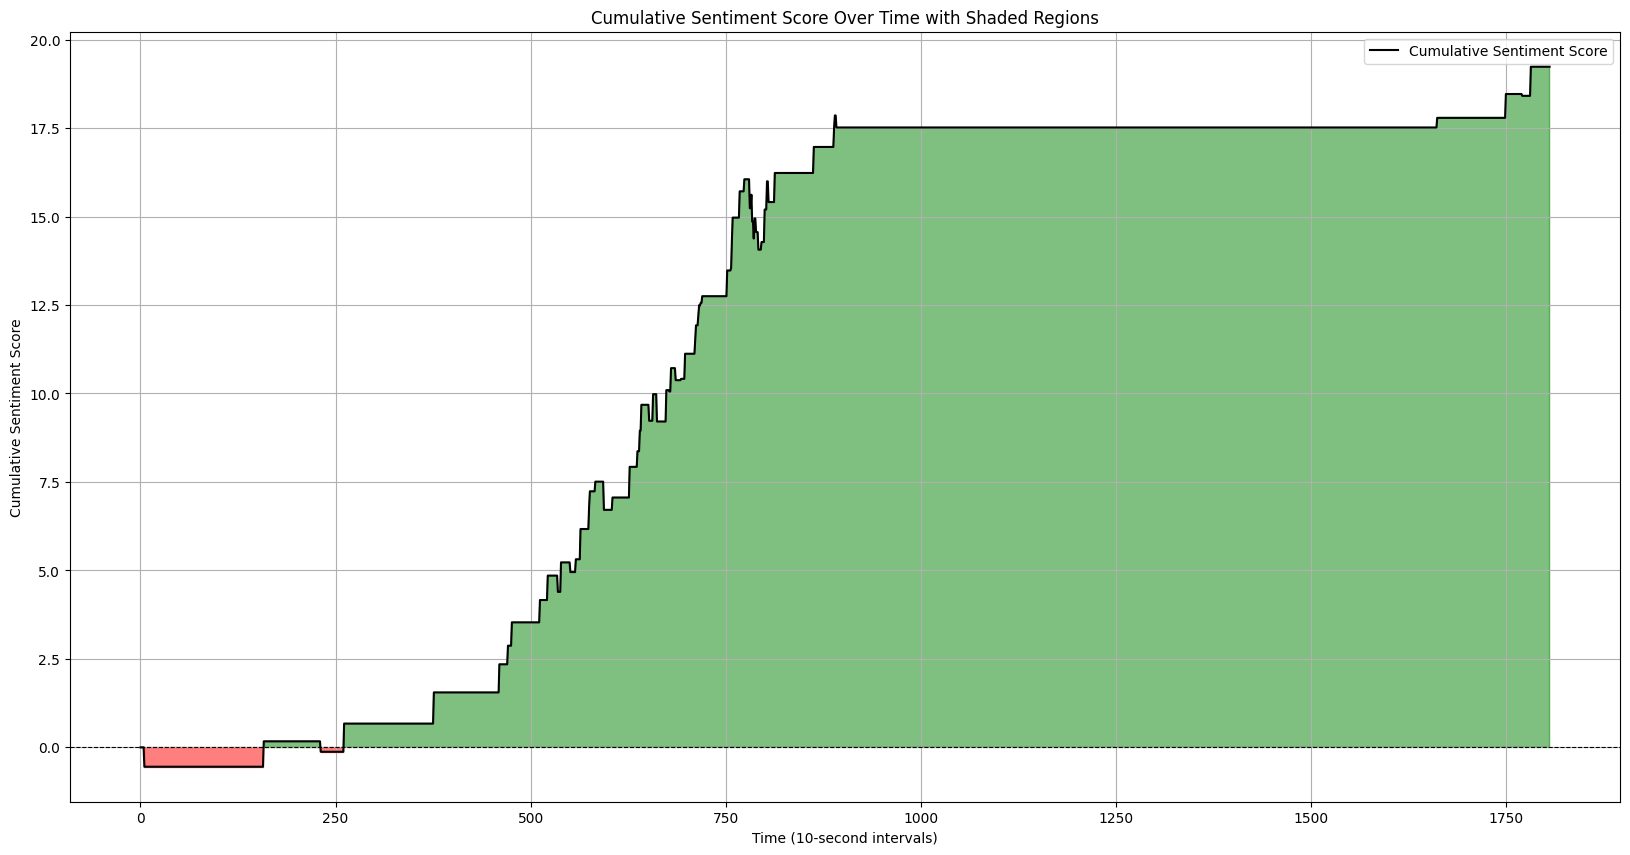

In [150]:
# Generate x-axis values (time intervals)
x = np.arange(len(sentiment_scores))

# Plotting the cumulative sentiment scores as a curve graph with shaded regions
plt.figure(figsize=(20, 10))
plt.plot(x, sentiment_scores, color='black', label='Cumulative Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

plt.xlabel('Time (10-second intervals)')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()

In [151]:
transcriptions_60 = [transcription.text for transcription in Transcription_60]

In [152]:
target_word = "C9"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores = analyze_sentiment(transcriptions_60, target_word, window_size)

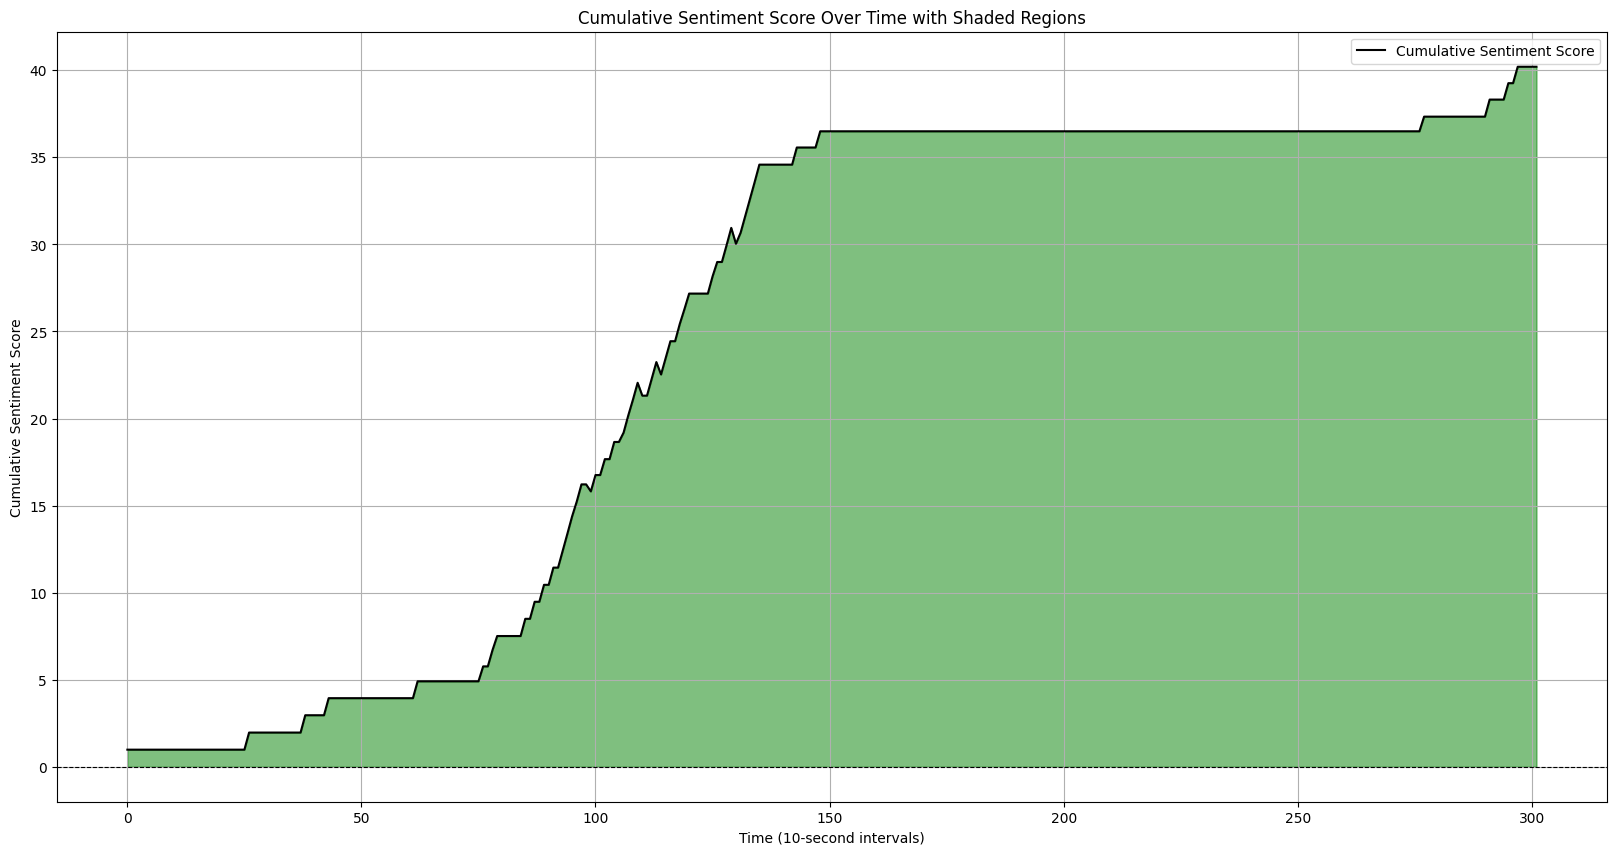

In [153]:
# Generate x-axis values (time intervals)
x = np.arange(len(sentiment_scores))

# Plotting the cumulative sentiment scores as a curve graph with shaded regions
plt.figure(figsize=(20, 10))
plt.plot(x, sentiment_scores, color='black', label='Cumulative Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

plt.xlabel('Time (10-second intervals)')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()

In [154]:
target_word = "NRG"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores = analyze_sentiment(sentences, target_word, window_size)

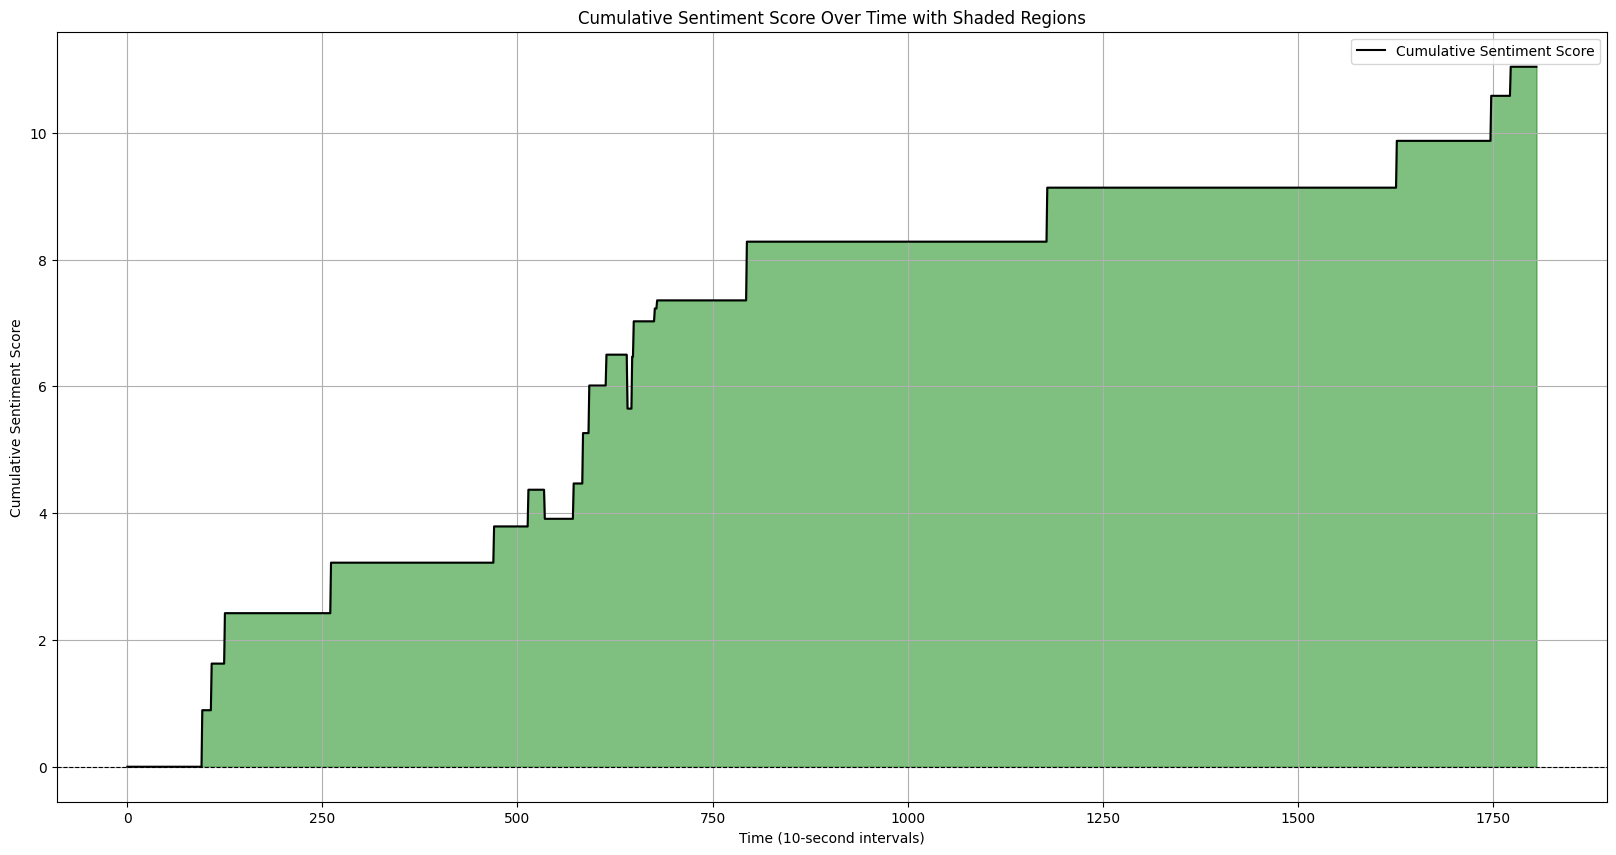

In [155]:
# Generate x-axis values (time intervals)
x = np.arange(len(sentiment_scores))

# Plotting the cumulative sentiment scores as a curve graph with shaded regions
plt.figure(figsize=(20, 10))
plt.plot(x, sentiment_scores, color='black', label='Cumulative Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

plt.xlabel('Time (10-second intervals)')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()

In [156]:
def analyze_sentiment(sentences, target_word, window_size):
    sia = SentimentIntensityAnalyzer()
    cumulative_score = 0  # Initialize cumulative sentiment score
    cumulative_scores = []  # Store cumulative sentiment scores
    max_positive_points = []  # Store indices where sentiment is maximum positive
    max_negative_points = []  # Store indices where sentiment is maximum negative

    for idx, sentence in enumerate(sentences):
        if target_word.lower() in sentence.lower():
            compound_score = sia.polarity_scores(sentence)['compound']
            cumulative_score += compound_score  # Add compound score to cumulative score
            # Adjust cumulative score to be within the range [-1, 1]
            cumulative_score = max(min(cumulative_score, 1), -1)
            
            if cumulative_score == 1:  # Check for maximum positive sentiment
                max_positive_points.append(idx)
            elif cumulative_score == -1:  # Check for maximum negative sentiment
                max_negative_points.append(idx)
        cumulative_scores.append(cumulative_score)  # Store cumulative score at each time interval
    sorted_scores = sorted(enumerate(cumulative_scores), key=lambda x: x[1])
    max_negative_indices = [idx for idx, _ in sorted_scores[:10]]
    max_negative_points = [cumulative_scores[idx] for idx in max_negative_indices]

    # Fill in any remaining intervals with last cumulative score
    while len(cumulative_scores) < len(sentences):
        cumulative_scores.append(cumulative_score)

    return cumulative_scores, max_positive_points, max_negative_points, max_negative_indices


In [157]:
target_word = "C9"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores, max_positive_points, max_negative_points,max_negative_indices = analyze_sentiment(sentences, target_word, window_size)


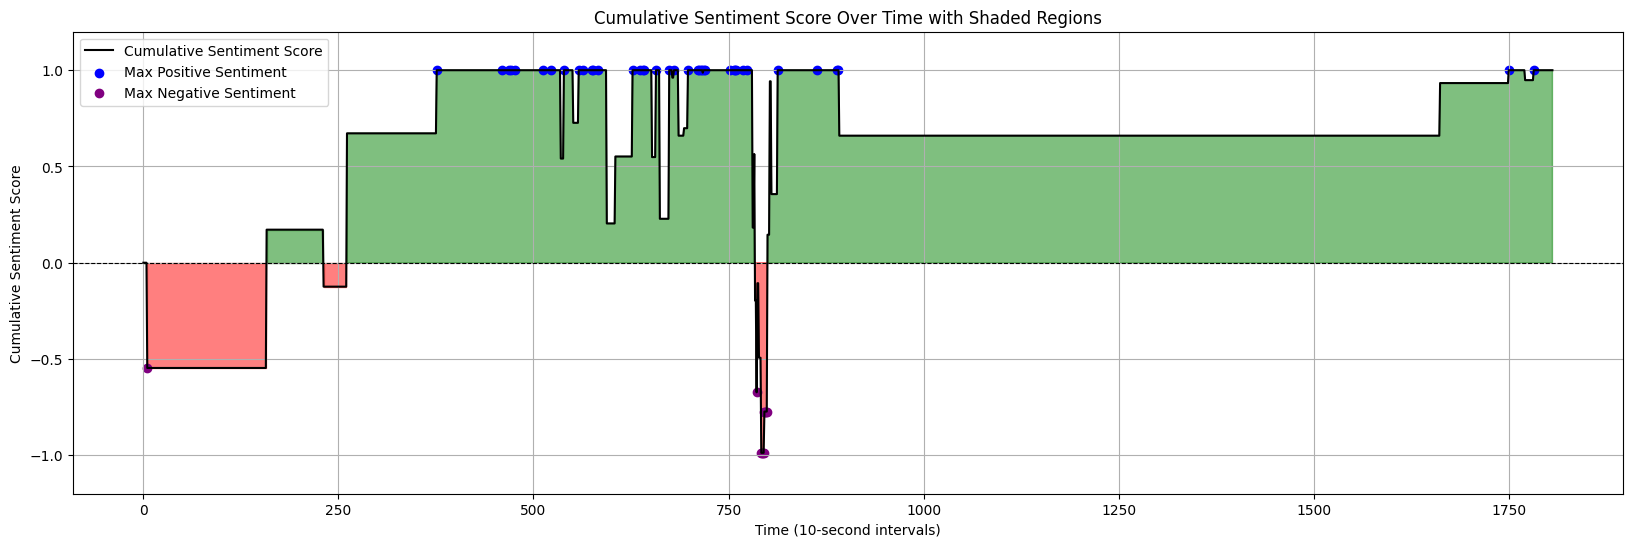

In [158]:
# Generate x-axis values (time intervals)
x = np.arange(len(sentiment_scores))

# Plotting the cumulative sentiment scores as a curve graph with shaded regions
plt.figure(figsize=(20, 6))
plt.plot(x, sentiment_scores, color='black', label='Cumulative Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

# Plot points where sentiment is maximum positive or maximum negative
plt.scatter(max_positive_points, [1] * len(max_positive_points), color='blue', label='Max Positive Sentiment')
plt.scatter(max_negative_indices,max_negative_points, color='purple', label='Max Negative Sentiment')

plt.xlabel('Time (10-second intervals)')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.ylim(-1.2, 1.2)  # Set y-axis limits to include both -1 and 1
plt.legend()
plt.grid(True)
plt.show()

In [159]:
target_word = "NRG"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores, max_positive_points, max_negative_points,max_negative_indices = analyze_sentiment(sentences, target_word, window_size)


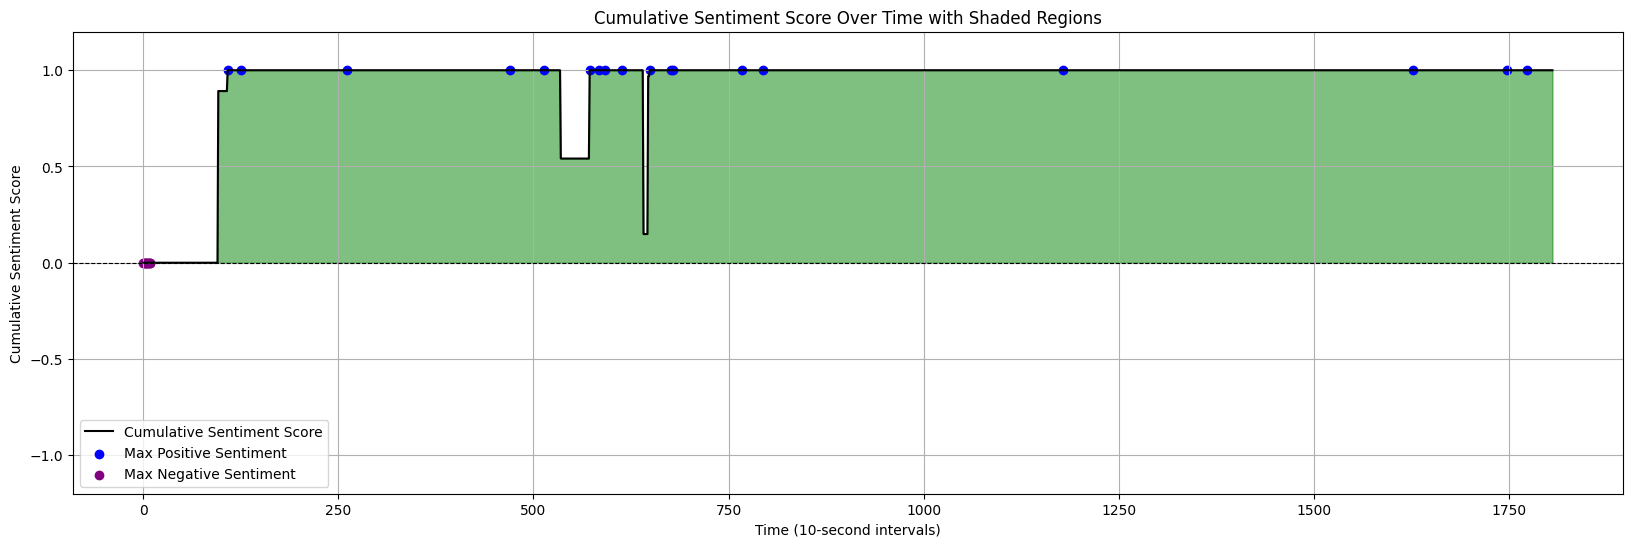

In [160]:
# Generate x-axis values (time intervals)
x = np.arange(len(sentiment_scores))

# Plotting the cumulative sentiment scores as a curve graph with shaded regions
plt.figure(figsize=(20, 6))
plt.plot(x, sentiment_scores, color='black', label='Cumulative Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

# Plot points where sentiment is maximum positive or maximum negative
plt.scatter(max_positive_points, [1] * len(max_positive_points), color='blue', label='Max Positive Sentiment')
plt.scatter(max_negative_indices,max_negative_points, color='purple', label='Max Negative Sentiment')

plt.xlabel('Time (10-second intervals)')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Cumulative Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.ylim(-1.2, 1.2)  # Set y-axis limits to include both -1 and 1
plt.legend()
plt.grid(True)
plt.show()

In [161]:
def analyze_sentiment_no_carryover(sentences, target_word, window_size):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = deque(maxlen=window_size)  # Use deque to store sentiment scores for moving average
    moving_average = []  # Store moving average values

    for sentence in sentences:
        if target_word.lower() in sentence.lower():
            compound_score = sia.polarity_scores(sentence)['compound']
            sentiment_scores.append(compound_score)
        else:
            sentiment_scores.append(0)  # Neutral sentiment if target word not found

        # Calculate moving average
        if sentiment_scores:
            moving_average.append(sum(sentiment_scores) / len(sentiment_scores))
        else:
            moving_average.append(0)  # Default to 0 if no scores

    return moving_average


In [162]:
target_word = "C9"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores = analyze_sentiment_no_carryover(sentences, target_word, window_size)

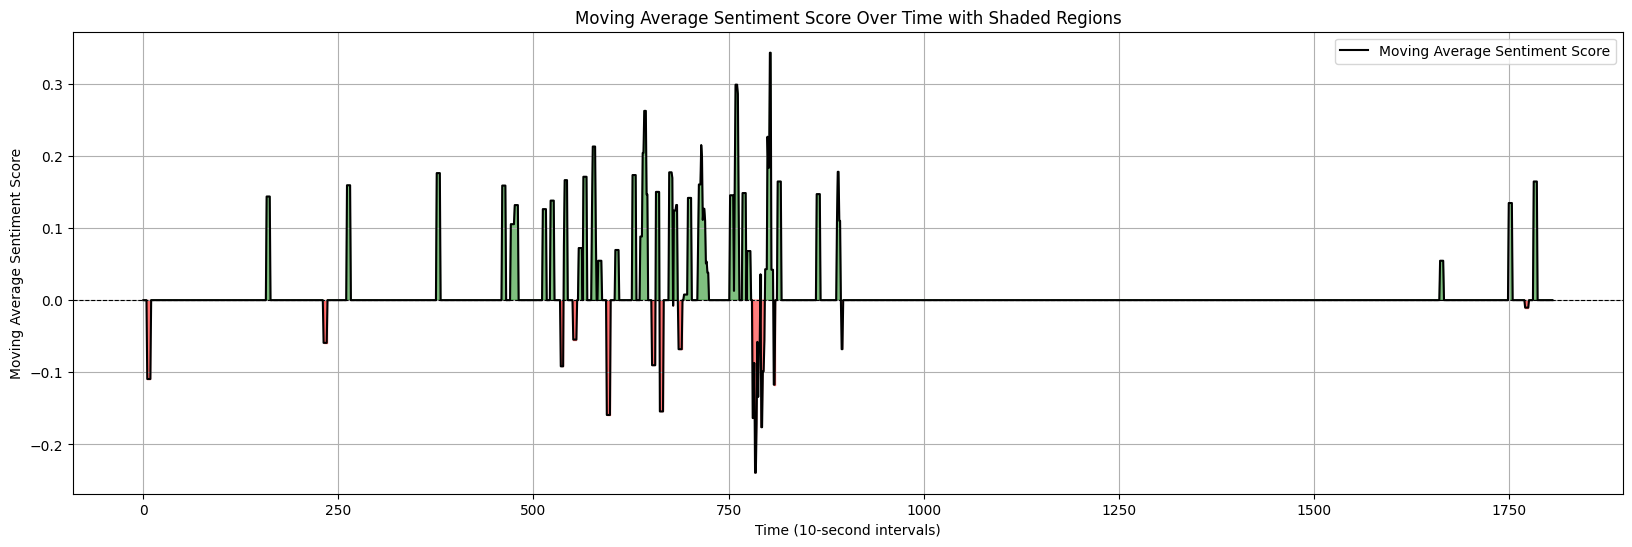

In [163]:
x = np.arange(len(sentiment_scores))

# Plotting the moving average as a curve graph with shaded regions
plt.figure(figsize=(20, 6))
plt.plot(x, sentiment_scores, color='black', label='Moving Average Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

plt.xlabel('Time (10-second intervals)')
plt.ylabel('Moving Average Sentiment Score')
plt.title('Moving Average Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()

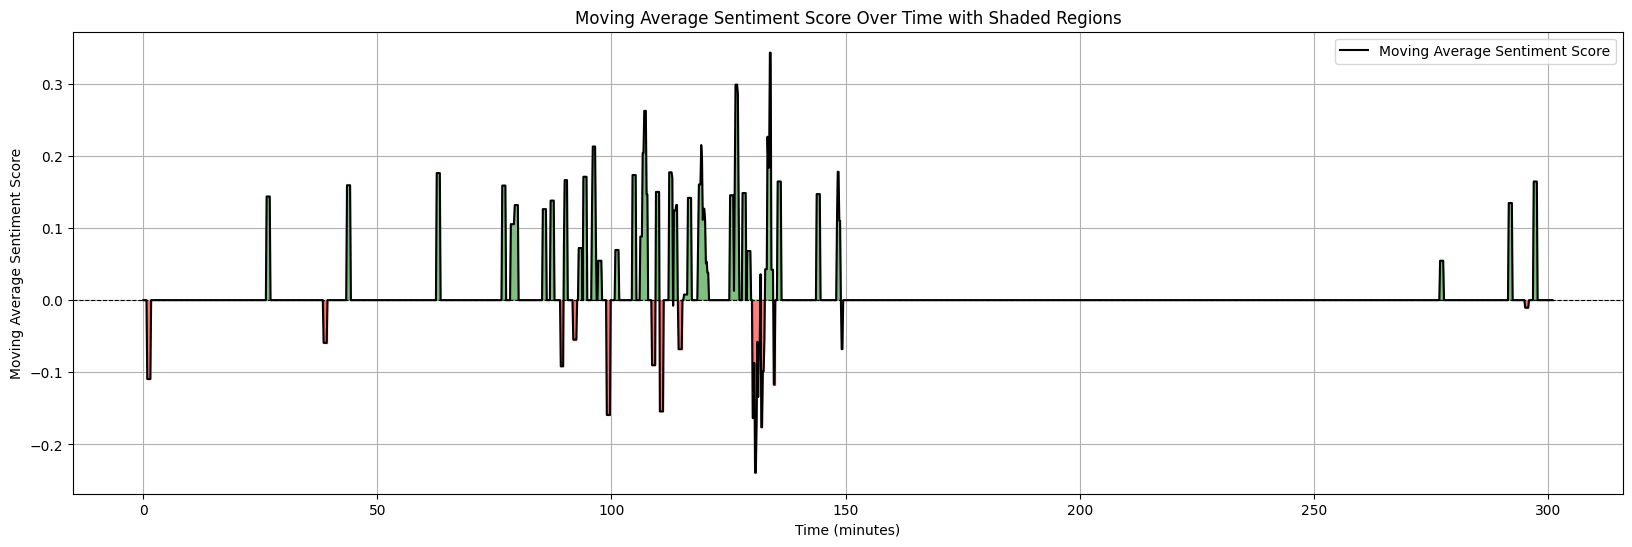

In [164]:
# Generate x-axis values (time intervals) in minutes
x = np.arange(len(sentiment_scores)) / 6  # Divide by 6 to convert from 10-second intervals to minutes

# Plotting the moving average as a curve graph with shaded regions
plt.figure(figsize=(20, 6))
plt.plot(x, sentiment_scores, color='black', label='Moving Average Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

plt.xlabel('Time (minutes)')
plt.ylabel('Moving Average Sentiment Score')
plt.title('Moving Average Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()

In [165]:
target_word = "Cloud9"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores = analyze_sentiment_no_carryover(sentences, target_word, window_size)

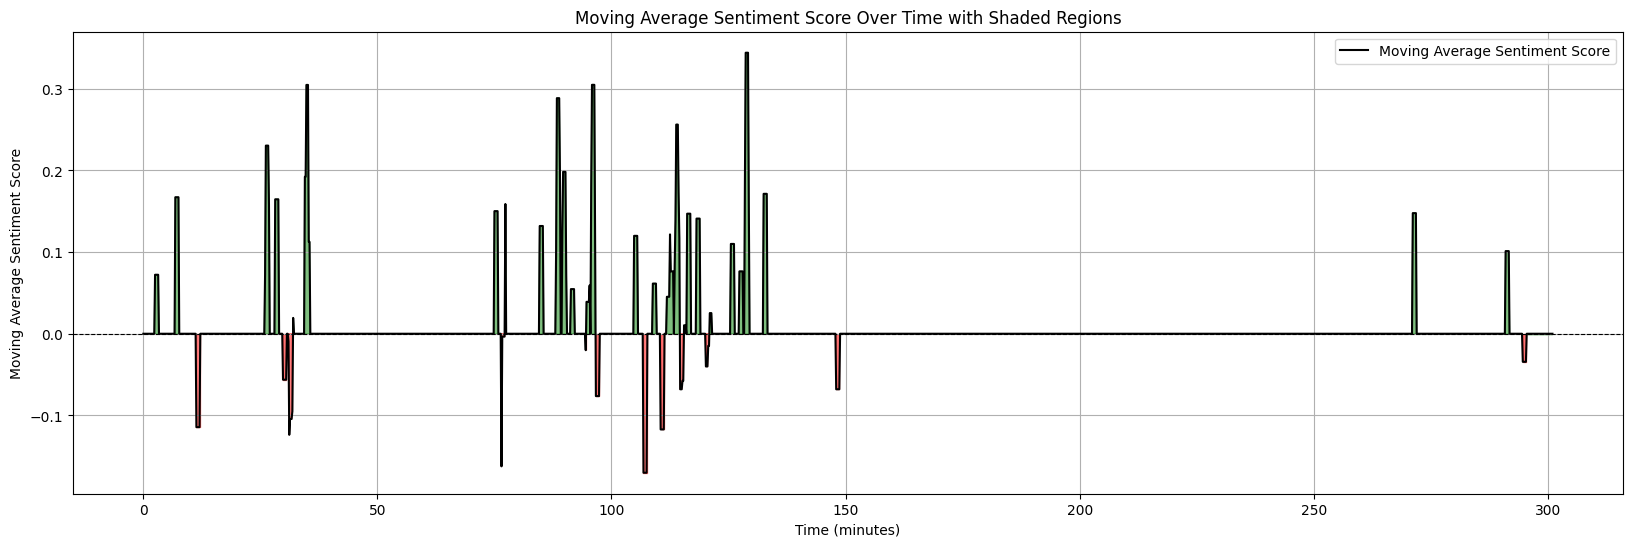

In [166]:
# Generate x-axis values (time intervals) in minutes
x = np.arange(len(sentiment_scores)) / 6  # Divide by 6 to convert from 10-second intervals to minutes

# Plotting the moving average as a curve graph with shaded regions
plt.figure(figsize=(20, 6))
plt.plot(x, sentiment_scores, color='black', label='Moving Average Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

plt.xlabel('Time (minutes)')
plt.ylabel('Moving Average Sentiment Score')
plt.title('Moving Average Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()

In [167]:
target_word = "NRG"
window_size = 5  # Adjust the window size as needed for your analysis
sentiment_scores = analyze_sentiment_no_carryover(sentences, target_word, window_size)

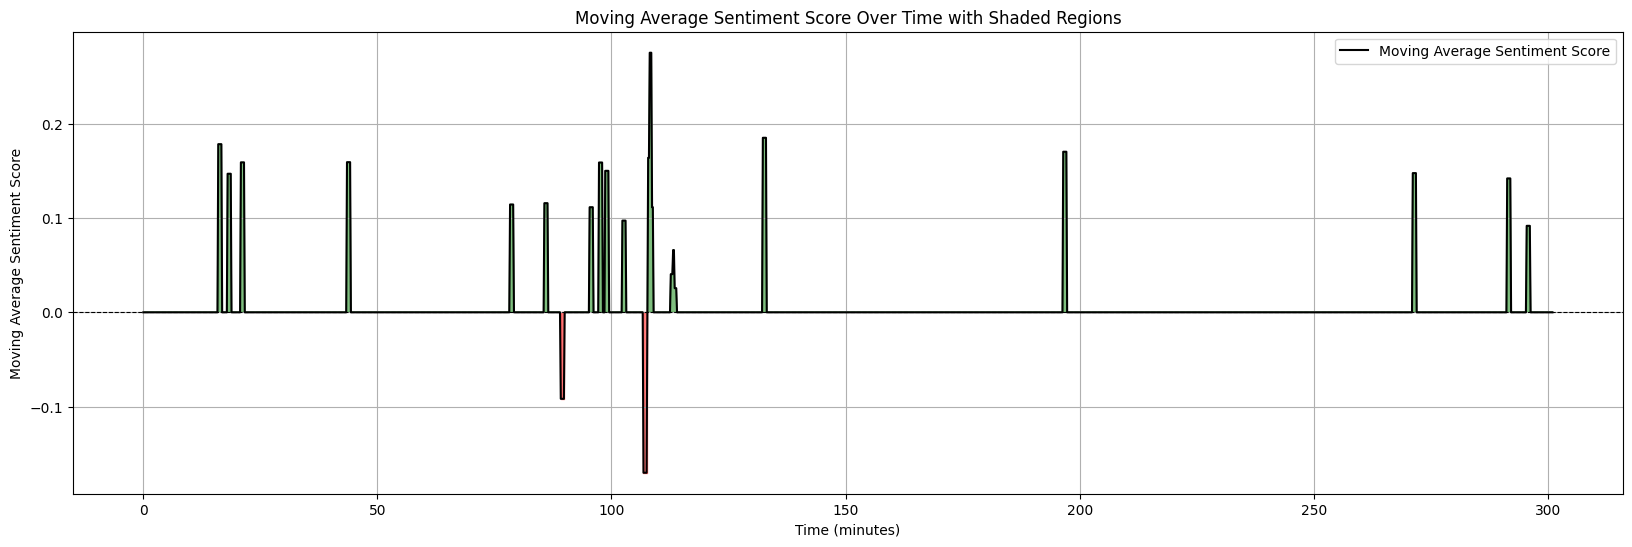

In [168]:
# Generate x-axis values (time intervals) in minutes
x = np.arange(len(sentiment_scores)) / 6  # Divide by 6 to convert from 10-second intervals to minutes

# Plotting the moving average as a curve graph with shaded regions
plt.figure(figsize=(20, 6))
plt.plot(x, sentiment_scores, color='black', label='Moving Average Sentiment Score')

# Highlight regions where sentiment scores are positive (green) or negative (red)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) >= 0), color='green', alpha=0.5)
plt.fill_between(x, sentiment_scores, where=(np.array(sentiment_scores) < 0), color='red', alpha=0.5)

plt.xlabel('Time (minutes)')
plt.ylabel('Moving Average Sentiment Score')
plt.title('Moving Average Sentiment Score Over Time with Shaded Regions')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()